# PCA

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv("e:/Git_private_dodo_Riley/laptop_desktop/Code_SJH/통계학머신러닝_양진욱/data/wholesale.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
# PCA(8개 > 2개)

pca = PCA(n_components=2)
result = pca.fit_transform(data)
result.shape

(440, 2)

In [8]:
# scaling

result = StandardScaler().fit(result).transform(result)
result[:10]

array([[ 0.05066239,  0.13161505],
       [-0.34502287,  0.33556674],
       [-0.37738286,  0.21406486],
       [ 0.07718709, -0.5212911 ],
       [ 0.83067886, -0.17928035],
       [-0.2155776 , -0.07967954],
       [-0.05576966, -0.16710073],
       [-0.34874672,  0.11866355],
       [-0.52313722, -0.18311407],
       [-0.37595155,  1.11903068]])

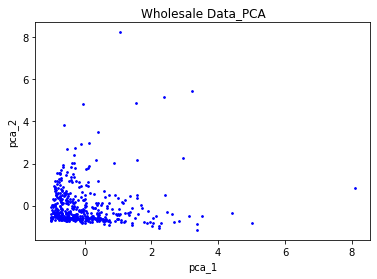

In [10]:
import matplotlib.pyplot as plt
plt.scatter(result[:,0],result[:,1],s=3,color='blue')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('Wholesale Data_PCA')
plt.show()
# 군집 1개, 나머지는 noise

# DBSCAN

- 데이터의 공간 다룸
- 전체 공간에서 데이터가 가장 밀집된 영역 찾음
- 밀집 영역(클러스터링), 클러스터 외부 영역으로 구분
- 밀집 정도 파악 하기 위해 데이터 포인트 간 거리 측정
- 데이터 압축 >> 거리 함수 선정 >> 군집분석(밀도_density)
- 이웃벡터 : 한 데이터로부터 반경 epsilon 원 안에 포함된 데이터 벡터(포인트)
- 핵심벡터 : n개 이상의 이웃벡터를 갖는 데이터 벡터
- 직접 접근 가능 : 핵심 벡터 p와 이웃벡터 q와의 관계 (p --> q)
- 접근 가능 p1 --> p2, p2 --> q
- 군집 : 한 핵심 벡터 p 에 대한 접근 가능한 모든 벡터들의 집합

In [14]:
dbsc = DBSCAN(eps=0.5, min_samples=15).fit(result)
labels = dbsc.labels_
labels
# -1은 noise를 의미, 군집은 1개

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [15]:
# core points
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_] = True
core_samples

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,

In [16]:
np.unique(labels)

array([-1,  0], dtype=int64)

In [19]:
# 색상 테이블 생성

unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

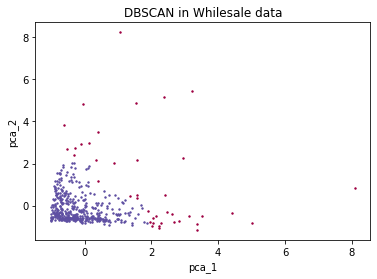

In [20]:
# 군집과 노이즈를 색깔로 구분
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels==label)
    xy = result[class_member_mask & core_samples]
    plt.scatter(xy[:,0],xy[:,1], color=color, s=2)
    
    xy2 = result[class_member_mask & ~core_samples]
    plt.scatter(xy2[:,0],xy2[:,1], color=color, s=2)

plt.title('DBSCAN in Whilesale data')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.show()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets

In [27]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

df_target = pd.DataFrame(y, columns=['target'])

In [28]:
import pandas as pd
import numpy as np 

names = ['sepal length','sepal width', 'petal length', 'petal width' ]
df_features = pd.DataFrame(X, columns=names)

In [29]:
df = pd.concat([df_features, df_target], axis=1)
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
X = df.drop(['target'], axis=1)
y = df.target

scaler = StandardScaler()
scaler.fit_transform(X)
pca_transformed = PCA(n_components=2).fit_transform(X)
df_pca = pd.DataFrame(pca_transformed, columns=['pca_1','pca_2'])

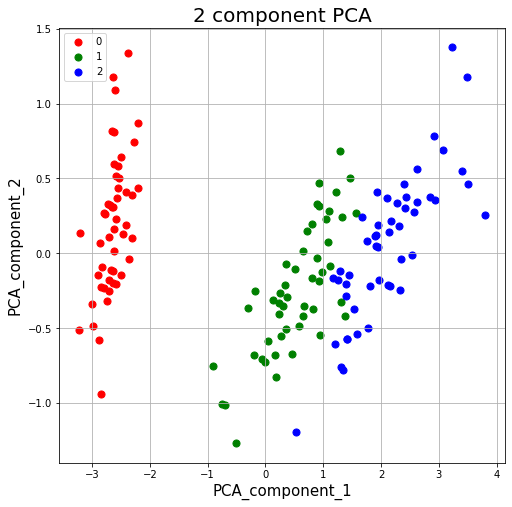

In [35]:
import matplotlib.pyplot as plt
df_final = pd.concat([df_pca,df.target],axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA_component_1', fontsize =15)
ax.set_ylabel('PCA_component_2', fontsize =15)
ax.set_title('2 component PCA', fontsize=20)

targets = [0, 1 , 2 ]
colors = ['r','g','b']

for target, color in zip(targets, colors):
    indicesToKeep = df_final['target'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'pca_1'],
               df_final.loc[indicesToKeep, 'pca_2'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()
